In [33]:
import yfinance as yf
import pandas as pd
import numpy as np

In [34]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [35]:
ticker = "^GSPC"
start_date = "2010-01-01"
end_date = "2023-12-31"

In [36]:
data = yf.download(ticker, start=start_date, end=end_date)
df = data[['Close']]
df = df.reset_index()
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

[*********************100%%**********************]  1 of 1 completed


In [37]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df)

In [38]:
prediction_days = 60

In [39]:
x_train, y_train = [], []

In [40]:
for i in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[i-prediction_days:i, 0])
    y_train.append(scaled_data[i, 0])

In [41]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [42]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))

In [43]:
model = Sequential()

In [44]:
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))

C:\Users\govin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [45]:
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [46]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [47]:
model.fit(x_train,y_train, epochs=25, batch_size=32)

Epoch 1/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.0224
Epoch 2/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 3.4842e-04
Epoch 3/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 3.3182e-04
Epoch 4/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 2.8655e-04
Epoch 5/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 2.9270e-04
Epoch 6/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 4.0400e-04
Epoch 7/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 3.0129e-04
Epoch 8/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 2.6290e-04
Epoch 9/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 2.3810e-04
Epoch 10/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 2.4842e-04
Epoch 11/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 2.5257e-04
Epoch 12/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 2.2184e-04
Epoch 13/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 2.2375e-04
Epoch 14/25
109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 2.

In [48]:
test_start = pd.to_datetime('2023-01-01')
test_end = pd.to_datetime('2023-12-31')
test_data = yf.download(ticker, start=test_start,end=test_end)
actual_prices = test_data['Close'].values

[*********************100%%**********************]  1 of 1 completed


In [49]:
total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

In [50]:
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

C:\Users\govin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [51]:
x_test = []

In [52]:
for i in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[i-prediction_days:i, 0])

In [53]:
x_test = np.array(x_test)

In [54]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [55]:
predicted_prices = model.predict(x_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step


In [56]:
predicted_prices = scaler.inverse_transform(predicted_prices)

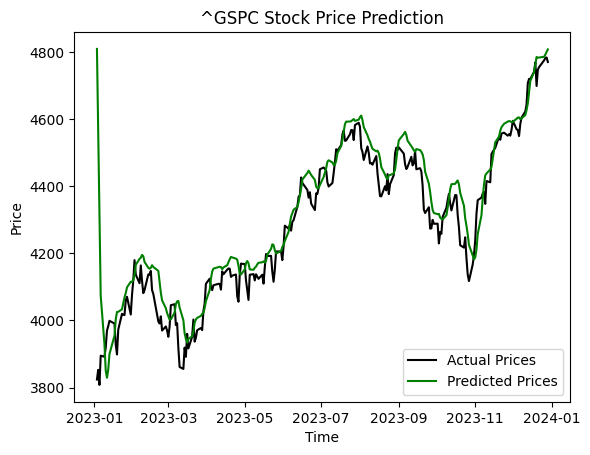

In [57]:
plt.plot(test_data.index, actual_prices, color='black', label='Actual Prices')
plt.plot(test_data.index, predicted_prices, color='green', label='Predicted Prices')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [58]:
real_data = [model_inputs[len(model_inputs) - prediction_days:, 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction for next day: {prediction[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Prediction for next day: 4808.77
